# ***Natural Language Processing Assignment-1 Solution***

## ***Basic Level***

In [2]:
# Text Dataset taken for Assignment
text = "Mahendra Singh Dhoni; born on 7 July 1981 is an Indian professional cricketer who plays as a right-handed batter and a wicket-keeper. Widely regarded as one of the most prolific wicket-keeper batsmen and captains, he represented the Indian cricket team and was the captain of the side in limited overs formats from 2007 to 2017 and in test cricket from 2008 to 2014. Dhoni has captained the most international matches and is the most successful Indian captain. He has led India to victory in the 2007 ICC World Twenty20, the 2011 Cricket World Cup, and the 2013 ICC Champions Trophy, being the only captain to win three different limited overs ICC tournaments. He also led the teams that won the Asia Cup in 2010 and 2016, and he was a member of the title winning squad in 2018."

### ***Text pre-processing for Natural Language Processing***

##### ***1. Lowercasing***

In [3]:
lower_case_text = text.lower()
print(lower_case_text)

mahendra singh dhoni; born on 7 july 1981 is an indian professional cricketer who plays as a right-handed batter and a wicket-keeper. widely regarded as one of the most prolific wicket-keeper batsmen and captains, he represented the indian cricket team and was the captain of the side in limited overs formats from 2007 to 2017 and in test cricket from 2008 to 2014. dhoni has captained the most international matches and is the most successful indian captain. he has led india to victory in the 2007 icc world twenty20, the 2011 cricket world cup, and the 2013 icc champions trophy, being the only captain to win three different limited overs icc tournaments. he also led the teams that won the asia cup in 2010 and 2016, and he was a member of the title winning squad in 2018.


##### ***2. Removing Puncuations and Special Characters***

In [4]:
import re
# For removing any characters other than word characters and whitespace
punctuation_pattern = r'[^\w\s]'
punctuation_removed_text = re.sub(punctuation_pattern, '', lower_case_text)
print(punctuation_removed_text)

mahendra singh dhoni born on 7 july 1981 is an indian professional cricketer who plays as a righthanded batter and a wicketkeeper widely regarded as one of the most prolific wicketkeeper batsmen and captains he represented the indian cricket team and was the captain of the side in limited overs formats from 2007 to 2017 and in test cricket from 2008 to 2014 dhoni has captained the most international matches and is the most successful indian captain he has led india to victory in the 2007 icc world twenty20 the 2011 cricket world cup and the 2013 icc champions trophy being the only captain to win three different limited overs icc tournaments he also led the teams that won the asia cup in 2010 and 2016 and he was a member of the title winning squad in 2018


##### ***3. Tokenization***

In [6]:
import nltk
from nltk.tokenize import word_tokenize
word_tokens = word_tokenize(punctuation_removed_text)
print("Word Tokenizer List:", word_tokens)

Word Tokenizer List: ['mahendra', 'singh', 'dhoni', 'born', 'on', '7', 'july', '1981', 'is', 'an', 'indian', 'professional', 'cricketer', 'who', 'plays', 'as', 'a', 'righthanded', 'batter', 'and', 'a', 'wicketkeeper', 'widely', 'regarded', 'as', 'one', 'of', 'the', 'most', 'prolific', 'wicketkeeper', 'batsmen', 'and', 'captains', 'he', 'represented', 'the', 'indian', 'cricket', 'team', 'and', 'was', 'the', 'captain', 'of', 'the', 'side', 'in', 'limited', 'overs', 'formats', 'from', '2007', 'to', '2017', 'and', 'in', 'test', 'cricket', 'from', '2008', 'to', '2014', 'dhoni', 'has', 'captained', 'the', 'most', 'international', 'matches', 'and', 'is', 'the', 'most', 'successful', 'indian', 'captain', 'he', 'has', 'led', 'india', 'to', 'victory', 'in', 'the', '2007', 'icc', 'world', 'twenty20', 'the', '2011', 'cricket', 'world', 'cup', 'and', 'the', '2013', 'icc', 'champions', 'trophy', 'being', 'the', 'only', 'captain', 'to', 'win', 'three', 'different', 'limited', 'overs', 'icc', 'tournam

##### ***4. Removal of Stopwords and tokenizing them***

In [7]:
from nltk.corpus import stopwords

# Remove stopwords function for any language
def remove_stopwords(text, language):
    stop_words = set(stopwords.words(language))
    word_tokens = word_tokenize(punctuation_removed_text)
    filtered_text = [word for word in word_tokens if word not in stop_words]
    print("Filtered Text:", filtered_text)

# Removing stopwords from our text data
remove_stopwords(punctuation_removed_text, 'english')

Filtered Text: ['mahendra', 'singh', 'dhoni', 'born', '7', 'july', '1981', 'indian', 'professional', 'cricketer', 'plays', 'righthanded', 'batter', 'wicketkeeper', 'widely', 'regarded', 'one', 'prolific', 'wicketkeeper', 'batsmen', 'captains', 'represented', 'indian', 'cricket', 'team', 'captain', 'side', 'limited', 'overs', 'formats', '2007', '2017', 'test', 'cricket', '2008', '2014', 'dhoni', 'captained', 'international', 'matches', 'successful', 'indian', 'captain', 'led', 'india', 'victory', '2007', 'icc', 'world', 'twenty20', '2011', 'cricket', 'world', 'cup', '2013', 'icc', 'champions', 'trophy', 'captain', 'win', 'three', 'different', 'limited', 'overs', 'icc', 'tournaments', 'also', 'led', 'teams', 'asia', 'cup', '2010', '2016', 'member', 'title', 'winning', 'squad', '2018']


##### ***5. Removing the URLs***

In [8]:
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

url_removed_text = remove_urls(punctuation_removed_text)
print("Text after URL removal:", url_removed_text)

Text after URL removal: mahendra singh dhoni born on 7 july 1981 is an indian professional cricketer who plays as a righthanded batter and a wicketkeeper widely regarded as one of the most prolific wicketkeeper batsmen and captains he represented the indian cricket team and was the captain of the side in limited overs formats from 2007 to 2017 and in test cricket from 2008 to 2014 dhoni has captained the most international matches and is the most successful indian captain he has led india to victory in the 2007 icc world twenty20 the 2011 cricket world cup and the 2013 icc champions trophy being the only captain to win three different limited overs icc tournaments he also led the teams that won the asia cup in 2010 and 2016 and he was a member of the title winning squad in 2018


##### ***6. Removing HTML Tags***

In [9]:
html_tags_pattern = r'<.*?>'
text_without_html_tags = re.sub(html_tags_pattern, '', url_removed_text)
print(text_without_html_tags)

mahendra singh dhoni born on 7 july 1981 is an indian professional cricketer who plays as a righthanded batter and a wicketkeeper widely regarded as one of the most prolific wicketkeeper batsmen and captains he represented the indian cricket team and was the captain of the side in limited overs formats from 2007 to 2017 and in test cricket from 2008 to 2014 dhoni has captained the most international matches and is the most successful indian captain he has led india to victory in the 2007 icc world twenty20 the 2011 cricket world cup and the 2013 icc champions trophy being the only captain to win three different limited overs icc tournaments he also led the teams that won the asia cup in 2010 and 2016 and he was a member of the title winning squad in 2018


##### ***7. Stemming***

In [10]:
# Performing lemmatization on html tag removed text

from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
clean_word_tokens = text_without_html_tags.split()
stemmed_words = []
for words in clean_word_tokens:
    stemmed_word = stemmer.stem(words)
    stemmed_words.append(stemmed_word)

print("Stemmed Words Array:", stemmed_words)

Stemmed Words Array: ['mahendra', 'singh', 'dhoni', 'born', 'on', '7', 'juli', '1981', 'is', 'an', 'indian', 'profession', 'cricket', 'who', 'play', 'as', 'a', 'righthand', 'batter', 'and', 'a', 'wicketkeep', 'wide', 'regard', 'as', 'one', 'of', 'the', 'most', 'prolif', 'wicketkeep', 'batsmen', 'and', 'captain', 'he', 'repres', 'the', 'indian', 'cricket', 'team', 'and', 'wa', 'the', 'captain', 'of', 'the', 'side', 'in', 'limit', 'over', 'format', 'from', '2007', 'to', '2017', 'and', 'in', 'test', 'cricket', 'from', '2008', 'to', '2014', 'dhoni', 'ha', 'captain', 'the', 'most', 'intern', 'match', 'and', 'is', 'the', 'most', 'success', 'indian', 'captain', 'he', 'ha', 'led', 'india', 'to', 'victori', 'in', 'the', '2007', 'icc', 'world', 'twenty20', 'the', '2011', 'cricket', 'world', 'cup', 'and', 'the', '2013', 'icc', 'champion', 'trophi', 'be', 'the', 'onli', 'captain', 'to', 'win', 'three', 'differ', 'limit', 'over', 'icc', 'tournament', 'he', 'also', 'led', 'the', 'team', 'that', 'won

##### ***8. Lemmatization***

In [11]:
# Performing lemmatization on html tag removed text

from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
lemmatized_words = []
for words in clean_word_tokens:
    lemmatized_word = lemmatizer.lemmatize(words)
    lemmatized_words.append(lemmatized_word)

print("Lemmatized Words Array:", lemmatized_words)

Lemmatized Words Array: ['mahendra', 'singh', 'dhoni', 'born', 'on', '7', 'july', '1981', 'is', 'an', 'indian', 'professional', 'cricketer', 'who', 'play', 'a', 'a', 'righthanded', 'batter', 'and', 'a', 'wicketkeeper', 'widely', 'regarded', 'a', 'one', 'of', 'the', 'most', 'prolific', 'wicketkeeper', 'batsman', 'and', 'captain', 'he', 'represented', 'the', 'indian', 'cricket', 'team', 'and', 'wa', 'the', 'captain', 'of', 'the', 'side', 'in', 'limited', 'over', 'format', 'from', '2007', 'to', '2017', 'and', 'in', 'test', 'cricket', 'from', '2008', 'to', '2014', 'dhoni', 'ha', 'captained', 'the', 'most', 'international', 'match', 'and', 'is', 'the', 'most', 'successful', 'indian', 'captain', 'he', 'ha', 'led', 'india', 'to', 'victory', 'in', 'the', '2007', 'icc', 'world', 'twenty20', 'the', '2011', 'cricket', 'world', 'cup', 'and', 'the', '2013', 'icc', 'champion', 'trophy', 'being', 'the', 'only', 'captain', 'to', 'win', 'three', 'different', 'limited', 'over', 'icc', 'tournament', 'he'

### ***Text Processing for Natural Language Processing***

##### ***1. Bag of Words***

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

def preprocessing(text):
    lower_case_text = text.lower()
    punctuation_pattern = r'[^\w\s]'
    punctuation_removed_text = re.sub(punctuation_pattern, '', lower_case_text)
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    url_removed_text = url_pattern.sub(r'', punctuation_removed_text)
    html_tags_pattern = r'<.*?>'
    text_without_html_tags = re.sub(html_tags_pattern, '', url_removed_text)
    return text_without_html_tags

sentences_list = nltk.sent_tokenize(text)
corpus = [preprocessing(sentence) for sentence in sentences_list]

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
feature_names = vectorizer.get_feature_names_out()
X_array = X.toarray()

print("Unique Word List: \n", feature_names)
print("Bag of Words Matrix: \n", X_array)


# Visualizing the Bag of Words Matrix using Pandas DataFrame
import pandas as pd
df = pd.DataFrame(data=X_array, columns=feature_names, index=corpus)
(df)

Unique Word List: 
 ['1981' '2007' '2008' '2010' '2011' '2013' '2014' '2016' '2017' '2018'
 'also' 'an' 'and' 'as' 'asia' 'batsmen' 'batter' 'being' 'born' 'captain'
 'captained' 'captains' 'champions' 'cricket' 'cricketer' 'cup' 'dhoni'
 'different' 'formats' 'from' 'has' 'he' 'icc' 'in' 'india' 'indian'
 'international' 'is' 'july' 'led' 'limited' 'mahendra' 'matches' 'member'
 'most' 'of' 'on' 'one' 'only' 'overs' 'plays' 'professional' 'prolific'
 'regarded' 'represented' 'righthanded' 'side' 'singh' 'squad'
 'successful' 'team' 'teams' 'test' 'that' 'the' 'three' 'title' 'to'
 'tournaments' 'trophy' 'twenty20' 'victory' 'was' 'who' 'wicketkeeper'
 'widely' 'win' 'winning' 'won' 'world']
Bag of Words Matrix: 
 [[1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1
  0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 1 1 0 0 0 0 0]
 [0 1 1 0 0 0 1 0 1 0 0 0 3 1 0 1 0 0 0 1 0 1 0 2 0 0 0 0 1 2 0 1 0 2 0 1
  0 0 0 0 1 0 0 0 1 2 0 1 0 1 0 0 1

,1981,2007,2008,2010,2011,2013,2014,2016,2017,2018,...,twenty20,victory,was,who,wicketkeeper,widely,win,winning,won,world
mahendra singh dhoni born on 7 july 1981 is an indian professional cricketer who plays as a righthanded batter and a wicketkeeper,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
widely regarded as one of the most prolific wicketkeeper batsmen and captains he represented the indian cricket team and was the captain of the side in limited overs formats from 2007 to 2017 and in test cricket from 2008 to 2014,0,1,1,0,0,0,1,0,1,0,...,0,0,1,0,1,1,0,0,0,0
dhoni has captained the most international matches and is the most successful indian captain,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
he has led india to victory in the 2007 icc world twenty20 the 2011 cricket world cup and the 2013 icc champions trophy being the only captain to win three different limited overs icc tournaments,0,1,0,0,1,1,0,0,0,0,...,1,1,0,0,0,0,1,0,0,2
he also led the teams that won the asia cup in 2010 and 2016 and he was a member of the title winning squad in 2018,0,0,0,1,0,0,0,1,0,1,...,0,0,1,0,0,0,0,1,1,0


##### ***2. Term Frequency - Inverse Document Frequency (TF-IDF)***

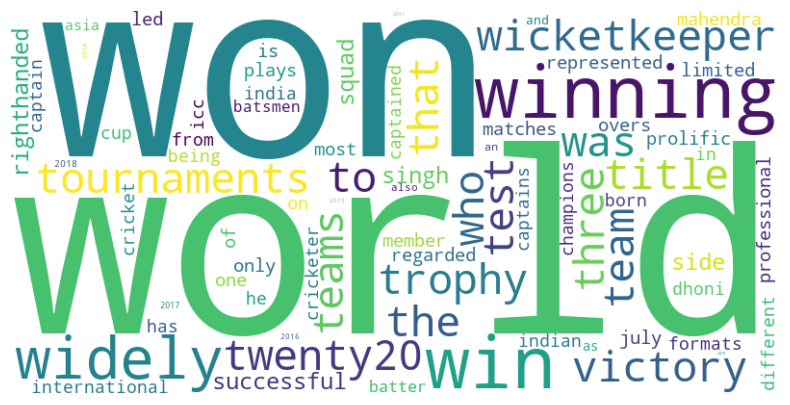

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(corpus)
terms = tfidf_vectorizer.get_feature_names_out()
df = pd.DataFrame(tfidf_matrix.toarray(), columns=terms)

df


from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(vectorizer.vocabulary_)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## ***Advanced Level***

##### ***1. Encodings***

In [31]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

tokenized_corpus = [nltk.word_tokenize(sentence.lower()) for sentence in corpus]
print("Tokenized Corpus:", tokenized_corpus)
all_words = [word for sentence in tokenized_corpus for word in sentence]
vocab = sorted(set(all_words))
print("Vocabulary:", vocab)
word_array = np.array(all_words).reshape(-1, 1)
one_hot_encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = one_hot_encoder.fit_transform(word_array)
print("One-hot encoded matrix:\n", one_hot_encoded)

Tokenized Corpus: [['mahendra', 'singh', 'dhoni', 'born', 'on', '7', 'july', '1981', 'is', 'an', 'indian', 'professional', 'cricketer', 'who', 'plays', 'as', 'a', 'righthanded', 'batter', 'and', 'a', 'wicketkeeper'], ['widely', 'regarded', 'as', 'one', 'of', 'the', 'most', 'prolific', 'wicketkeeper', 'batsmen', 'and', 'captains', 'he', 'represented', 'the', 'indian', 'cricket', 'team', 'and', 'was', 'the', 'captain', 'of', 'the', 'side', 'in', 'limited', 'overs', 'formats', 'from', '2007', 'to', '2017', 'and', 'in', 'test', 'cricket', 'from', '2008', 'to', '2014'], ['dhoni', 'has', 'captained', 'the', 'most', 'international', 'matches', 'and', 'is', 'the', 'most', 'successful', 'indian', 'captain'], ['he', 'has', 'led', 'india', 'to', 'victory', 'in', 'the', '2007', 'icc', 'world', 'twenty20', 'the', '2011', 'cricket', 'world', 'cup', 'and', 'the', '2013', 'icc', 'champions', 'trophy', 'being', 'the', 'only', 'captain', 'to', 'win', 'three', 'different', 'limited', 'overs', 'icc', 'tou

##### ***2. Word Embeddings and Word2Vec***

Similarity between 'dhoni' and 'captain': 0.9108571410179138 with CBOW
Similarity between 'dhoni' and 'captain': 0.988159716129303 with Skip-Gram


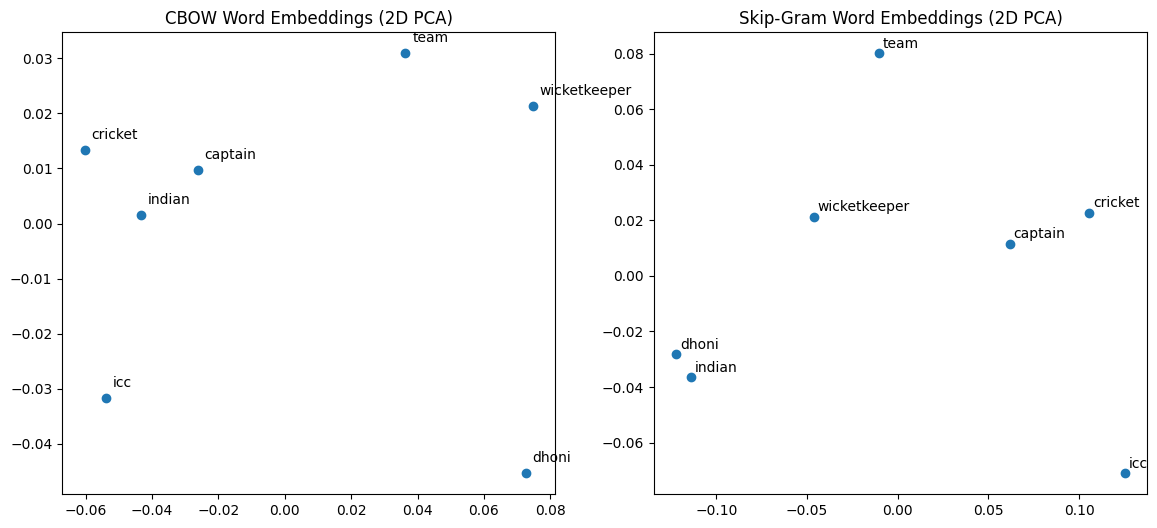

In [40]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from gensim.models import Word2Vec

cbow_model = Word2Vec(sentences=tokenized_corpus, vector_size=100, window=5, min_count=1, sg=0, epochs=100)

skipgram_model = Word2Vec(sentences=tokenized_corpus, vector_size=100, window=5, min_count=1, sg=1, epochs=150)

word_vectors_cbow = cbow_model.wv
similarity_cbow = word_vectors_cbow.similarity('dhoni', 'captain')
print(f"Similarity between 'dhoni' and 'captain': {similarity_cbow} with CBOW")


word_vectors_skipgram= skipgram_model.wv
similarity_skip = word_vectors_skipgram.similarity('dhoni', 'captain')
print(f"Similarity between 'dhoni' and 'captain': {similarity_skip} with Skip-Gram")

words_to_plot = ['dhoni', 'captain', 'wicketkeeper', 'indian', 'cricket', 'team', 'icc']

vectors_cbow = [cbow_model.wv[word] for word in words_to_plot]
vectors_skip = [skipgram_model.wv[word] for word in words_to_plot]

pca = PCA(n_components=2)
vectors_cbow_2d = pca.fit_transform(vectors_cbow)
vectors_skip_2d = pca.fit_transform(vectors_skip)

fig, axes = plt.subplots(1, 2, figsize=(14,6))

axes[0].scatter(vectors_cbow_2d[:,0], vectors_cbow_2d[:,1])
for i, word in enumerate(words_to_plot):
    axes[0].text(vectors_cbow_2d[i,0]+0.002, vectors_cbow_2d[i,1]+0.002, word)
axes[0].set_title("CBOW Word Embeddings (2D PCA)")

axes[1].scatter(vectors_skip_2d[:,0], vectors_skip_2d[:,1])
for i, word in enumerate(words_to_plot):
    axes[1].text(vectors_skip_2d[i,0]+0.002, vectors_skip_2d[i,1]+0.002, word)
axes[1].set_title("Skip-Gram Word Embeddings (2D PCA)")

plt.show()